Short MC example of https://journals.aps.org/prb/abstract/10.1103/PhysRevB.102.024102#fulltext for a 1D chain.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
N = 16
spins = np.zeros( (grid,) )

lAA = 1
lAB = 2
lBB = 3

A-A-A-A--B---B---B


A--B--A-A--B---B---B

In [26]:

# (s + s')/2 + 1
#  = 0 iff s = s' = -1
#  = 1 iff s != s'
#  = 2 iff s = s' = 1
l = np.array([3, 2, 1])

def R(spins):
    spins = np.asarray(spins)
    return np.cumsum(np.append(0, l[ np.array((spins[:-1] + spins[1:])/2 + 1, dtype = int) ]))

In [28]:
R([1, 1, 1, -1, -1, -1])

array([ 0,  1,  2,  4,  7, 10])

In [33]:
def short_range(spins, coef):
    # maps eq. 4
    # TODO: only nn
    return coef * np.sum( spins * np.roll(spins, 1) )

In [34]:
def long_range(spins, coef):
    # maps eq. 5
    return coef * np.sum(spins)**2 / len(spins)

In [35]:
def hamiltonian(spins, short, long, field):
    # maps eq. 3
    return short_range(spins, short) + long_range(spins, long) - field * spins.sum()

In [111]:
N = 100
S = np.random.choice( [1, -1], N )

In [97]:
def plot(spins):
    plt.scatter(R(spins),  np.zeros_like(spins), c = spins)

In [73]:
hamiltonian(S, -1, -1, 0)

10.56

In [139]:
def mc(steps, spins, temperature, ham_parameters):
    E0 = hamiltonian(spins, *ham_parameters)
    Es = []
    ms = []
    for _ in range(steps):
        i = np.random.randint(len(spins))
        spins[i] *= -1
        E = hamiltonian(spins, *ham_parameters)
        if np.random.rand() < np.exp(- (E - E0) / temperature):
            E0 = E
            Es.append(E)
            ms.append(spins.sum())
        else:
            spins[i] *= -1
            
    return spins, Es, ms

In [140]:
S, Es, ms = mc(1000, S, 1, (-1, 0, 0))

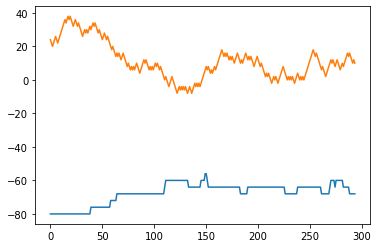

In [142]:
plt.plot(Es)
plt.plot(ms)

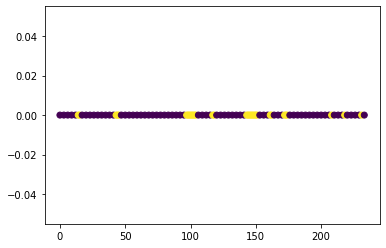

In [132]:
plot(S)

<ErrorbarContainer object of 3 artists>

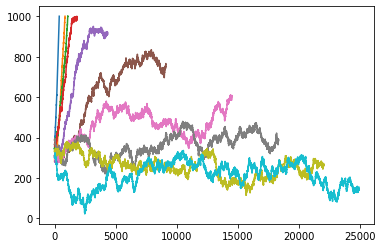

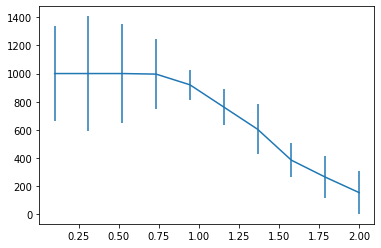

In [197]:
N = 1000
Ts = np.linspace(.1, 2, 10)
Ms = []
Ms2 = []
for T in Ts:
    S = np.random.choice( [1, -1], N, p = [2/3, 1/3] )
    #S = np.ones(N)
    S, Es, ms = mc(50000, S, T, (-1, -.1, .1))
    Ms.append(abs(S.sum()))
    Ms2.append(np.std(ms[len(ms)//2::10]))
    plt.plot(ms, label = T)
    #print(np.array(ms)[-100::10].var())
    #plt.figure()
    #plot(S)
    
plt.figure()
plt.errorbar(Ts, Ms, 3*np.array(Ms2), 0)